In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from vachoppy import trajectory

In [2]:
num_idx = 10
num_step = 300

step = np.arange(300)
temp = np.arange(1200, 3000+1, 100)
indices = [format(i+1, '02') for i in range(num_idx)]

In [3]:
# save data

distance = []

for t in temp:
    distance_m = np.zeros((num_idx, num_step))
    distance_t = np.zeros((num_idx, num_step))
    distance_po = np.zeros((num_idx, num_step))
    distance_ao = np.zeros((num_idx, num_step))

    for i, idx in enumerate(indices):
        path_txt = os.path.join(f"{t}K", f"{idx}.txt")
        data = np.loadtxt(path_txt, skiprows=1)

        distance_m[i] = data[:,1]
        distance_t[i] = data[:,2]
        distance_po[i] = data[:,3]
        distance_ao[i] = data[:,4]
    
    distance_m = distance_m.reshape(1,-1).squeeze()
    distance_t = distance_t.reshape(1,-1).squeeze()
    distance_po = distance_po.reshape(1,-1).squeeze()
    distance_ao = distance_ao.reshape(1,-1).squeeze()

    dic = {}
    dic['temp'] = t
    dic['M'] = distance_m
    dic['T'] = distance_t
    dic['PO'] = distance_po
    dic['AO'] = distance_ao

    distance.append(dic)

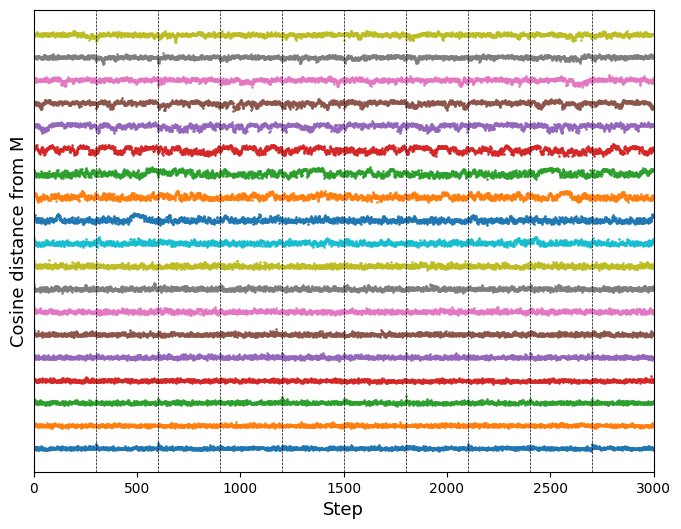

In [4]:
x = np.arange(num_step*num_idx)

plt.figure(figsize=(8, 6))

plt.xlabel('Step', fontsize=13)
plt.ylabel('Cosine distance from M', fontsize=13)


interval = 0.1
for i, d in enumerate(distance):
    d_T = d['M'] + i*interval
    plt.scatter(x, d_T, s=0.7, label=f"{d['temp']}K")

for i in range(num_idx-1):
    plt.axvline((i+1)*num_step, color='k', linestyle='--', linewidth=0.5)

plt.xlim([0, num_step*num_idx])
# plt.ylim([0.14, 0.32+interval*len(distance)])
plt.yticks([],[])

plt.savefig('distance_all.png', dpi=300)
plt.show()

[]

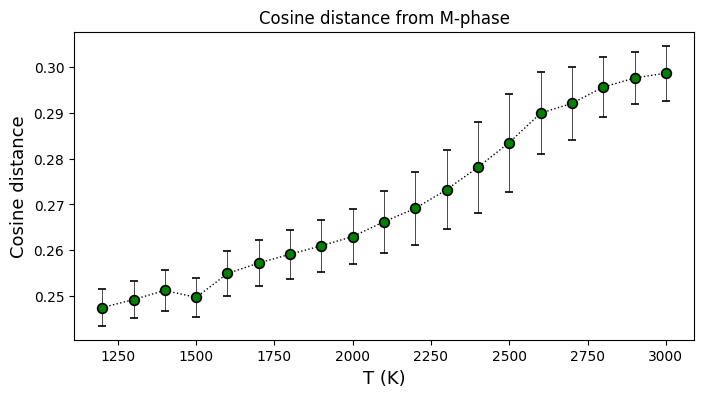

In [5]:
data_M = np.zeros((len(temp), num_step*num_idx))
for i, t in enumerate(temp):
    data_M[i] = distance[i]['M']

means = np.average(data_M, axis=1)
stds = np.std(data_M, axis=1)

plt.figure(figsize=(8,4))
plt.errorbar(temp, means, yerr=stds,
             linestyle=':', c='k', linewidth=1,
             ecolor='k', capsize=3, elinewidth=0.5,
             marker='o', mfc='g', mec='k', mew=1.2, ms=7)

plt.xlabel('T (K)', fontsize=13)
plt.ylabel('Cosine distance', fontsize=13)
plt.title('Cosine distance from M-phase')
plt.plot()

[]

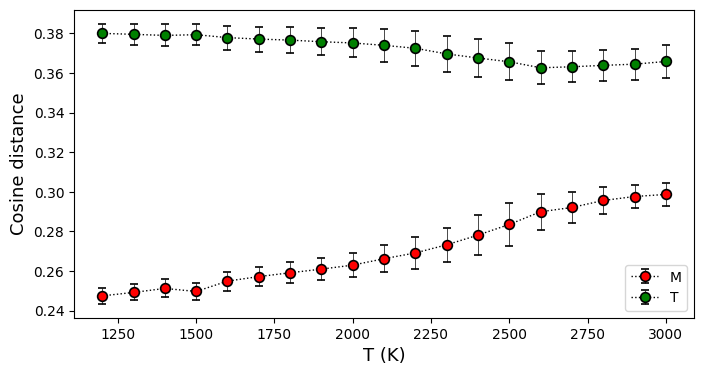

In [6]:
phase = 'T'

def plot_mean_distance(phase, mfc='white'):
    data = np.zeros((len(temp), num_step*num_idx))
    for i, t in enumerate(temp):
        data[i] = distance[i][phase]

    means = np.average(data, axis=1)
    stds = np.std(data, axis=1)

    
    plt.errorbar(temp, means, yerr=stds,
                linestyle=':', c='k', linewidth=1,
                ecolor='k', capsize=3, elinewidth=0.5,
                marker='o', mfc=mfc, mec='k', mew=1.2, ms=7,
                label=f"{phase}")

    plt.xlabel('T (K)', fontsize=13)
    plt.ylabel('Cosine distance', fontsize=13)

plt.figure(figsize=(8,4))

plot_mean_distance('M', 'r')
plot_mean_distance('T', 'g')
# plot_mean_distance('PO', 'c')
# plot_mean_distance('AO', 'm')

plt.legend()
plt.plot()

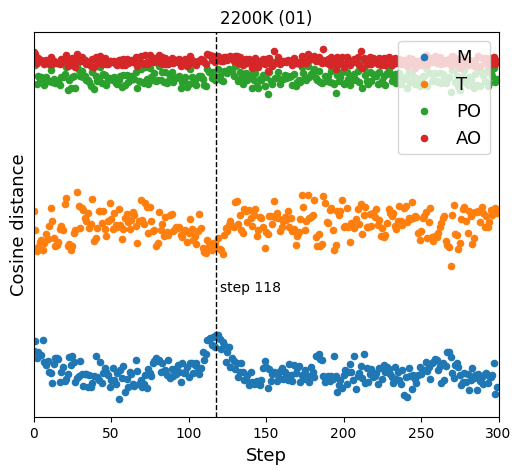

In [7]:
plt.figure(figsize=(6,5))
plt.xlabel('Step', fontsize=13)
plt.ylabel('Cosine distance', fontsize=13)

T = 2200
ensemble = 1

p1 = 'M'
p2 = 'T'
p3 = 'PO'
p4 = 'AO'
T_idx = np.where(temp==T)[0][0]

s=20
plt.scatter(np.arange(num_step), 
            distance[T_idx][p1][num_step*(ensemble-1):num_step*(ensemble)]-0.25,
            s=s,
            label=p1)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p2][num_step*(ensemble-1):num_step*(ensemble)]-0.25, 
            s=s,
            label=p2)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p3][num_step*(ensemble-1):num_step*(ensemble)]-0.09, 
            s=s,
            label=p3)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p4][num_step*(ensemble-1):num_step*(ensemble)]+0.16, 
            s=s,
            label=p4)

# the lowest point
d_m = distance[T_idx][p1][num_step*(ensemble-1):num_step*(ensemble)]
d_t = distance[T_idx][p2][num_step*(ensemble-1):num_step*(ensemble)]

step_trans = np.argmin(d_t-d_m)
plt.axvline(step_trans, color='k', linestyle='--', linewidth=1)
plt.text(step_trans+2,
         (d_m[step_trans]+d_t[step_trans])/2-0.25,
         s=f"step {step_trans}")

plt.xlim([0, num_step])
plt.yticks([],[])
plt.title(f"{T}K ({format(ensemble,'02')})")
plt.legend(loc='upper right', fontsize=13)
plt.show()

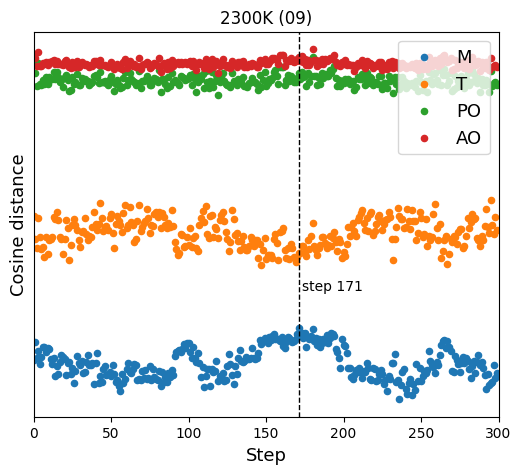

In [8]:
plt.figure(figsize=(6,5))
plt.xlabel('Step', fontsize=13)
plt.ylabel('Cosine distance', fontsize=13)

T = 2300
ensemble = 9

p1 = 'M'
p2 = 'T'
p3 = 'PO'
p4 = 'AO'
T_idx = np.where(temp==T)[0][0]

s=20
plt.scatter(np.arange(num_step), 
            distance[T_idx][p1][num_step*(ensemble-1):num_step*(ensemble)]-0.25,
            s=s,
            label=p1)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p2][num_step*(ensemble-1):num_step*(ensemble)]-0.25, 
            s=s,
            label=p2)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p3][num_step*(ensemble-1):num_step*(ensemble)]-0.09, 
            s=s,
            label=p3)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p4][num_step*(ensemble-1):num_step*(ensemble)]+0.16, 
            s=s,
            label=p4)

# the lowest point
d_m = distance[T_idx][p1][num_step*(ensemble-1):num_step*(ensemble)]
d_t = distance[T_idx][p2][num_step*(ensemble-1):num_step*(ensemble)]

step_trans = np.argmin(d_t-d_m)
plt.axvline(step_trans, color='k', linestyle='--', linewidth=1)
plt.text(step_trans+2,
         (d_m[step_trans]+d_t[step_trans])/2-0.25,
         s=f"step {step_trans}")

plt.xlim([0, num_step])
plt.yticks([],[])

plt.title(f"{T}K ({format(ensemble,'02')})")
plt.legend(loc='upper right', fontsize=13)
plt.show()

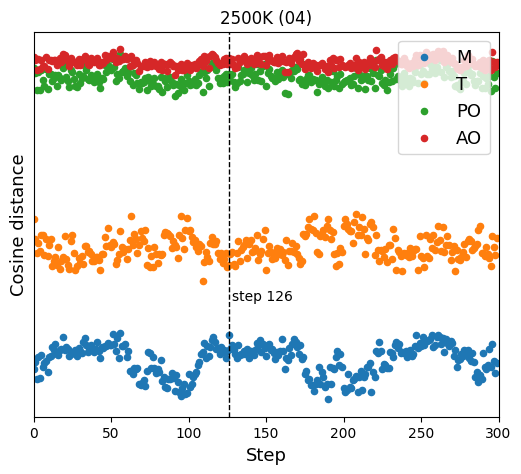

In [9]:
plt.figure(figsize=(6,5))
plt.xlabel('Step', fontsize=13)
plt.ylabel('Cosine distance', fontsize=13)

T = 2500
ensemble = 4

p1 = 'M'
p2 = 'T'
p3 = 'PO'
p4 = 'AO'
T_idx = np.where(temp==T)[0][0]

s=20
plt.scatter(np.arange(num_step), 
            distance[T_idx][p1][num_step*(ensemble-1):num_step*(ensemble)]-0.25,
            s=s,
            label=p1)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p2][num_step*(ensemble-1):num_step*(ensemble)]-0.25, 
            s=s,
            label=p2)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p3][num_step*(ensemble-1):num_step*(ensemble)]-0.09, 
            s=s,
            label=p3)

plt.scatter(np.arange(num_step), 
            distance[T_idx][p4][num_step*(ensemble-1):num_step*(ensemble)]+0.16, 
            s=s,
            label=p4)

# the lowest point
d_m = distance[T_idx][p1][num_step*(ensemble-1):num_step*(ensemble)]
d_t = distance[T_idx][p2][num_step*(ensemble-1):num_step*(ensemble)]

step_trans = np.argmin(d_t-d_m)
plt.axvline(step_trans, color='k', linestyle='--', linewidth=1)
plt.text(step_trans+2,
         (d_m[step_trans]+d_t[step_trans])/2-0.25,
         s=f"step {step_trans}")

plt.xlim([0, num_step])
plt.yticks([],[])

plt.title(f"{T}K ({format(ensemble,'02')})")
plt.legend(loc='upper right', fontsize=13)
plt.show()

In [10]:
# save poscar files
temp = 2500
ensemble = '04'

path_dir = f'xdatcar/xdatcar.{temp}K'
path_poscar = os.path.join(path_dir, 'POSCAR_SUPERCELL')
path_xdatcar = os.path.join(path_dir, f"XDATCAR_{ensemble}")

traj = trajectory.LatticeHopping(poscar_perf=path_poscar,
                                 xdatcar= path_xdatcar)

traj.save_poscar(step=126)

'xdatcar/xdatcar.2500K/POSCAR_SUPERCELL' is not found.


SystemExit: 0

/home/taeyoung/anaconda3/envs/cmd/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
